In [19]:
# https://learn.microsoft.com/zh-cn/training/modules/introduction-to-machine-learning/3-exercise-create-ml-model

In [20]:
# 1. Import Libraries

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [21]:
# 2. Load and Prepare Data

# Define the data as given in the exercise
data = {
    'boot_size': [
        39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
        40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
        42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
        35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
        42, 35, 36, 41, 41, 41, 39, 39, 35, 39
    ],
    'harness_size': [
        58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
        59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
        59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
        55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
        60, 51, 52, 56, 55, 57, 58, 57, 51, 59
    ]
}

# Convert to DataFrame
dataset = pd.DataFrame(data)

# Convert to PyTorch tensors
y_boot_size = torch.tensor(dataset['boot_size'].values, dtype=torch.float32).view(-1, 1)
x_harness_size = torch.tensor(dataset['harness_size'].values, dtype=torch.float32).view(-1, 1)


In [22]:
# 3. Define the Neural Network Model

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # Input size is 1 (harness size), output size is 10
        self.fc2 = nn.Linear(10, 1)  # Input size is 10, output size is 1 (boot size prediction)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = NeuralNetwork()


In [23]:
# 4. Define Training Loop

optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_harness_size)
    loss = criterion(outputs, y_boot_size)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [50/500], Loss: 2.6622
Epoch [100/500], Loss: 2.5239
Epoch [150/500], Loss: 2.5102
Epoch [200/500], Loss: 2.5099
Epoch [250/500], Loss: 2.5097
Epoch [300/500], Loss: 2.5095
Epoch [350/500], Loss: 2.5092
Epoch [400/500], Loss: 2.5089
Epoch [450/500], Loss: 2.5086
Epoch [500/500], Loss: 2.5083


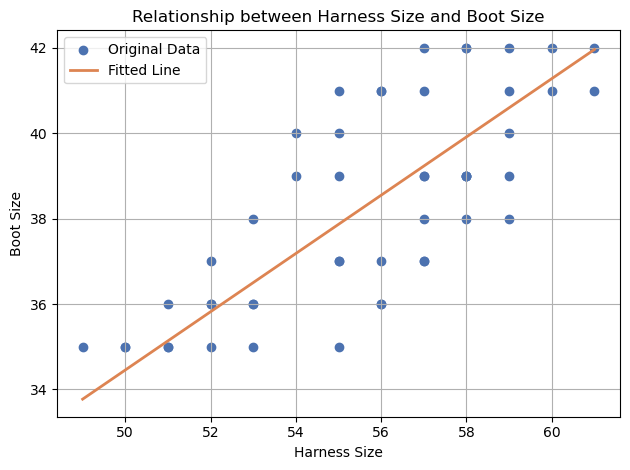

Predicted boot size for harness size 52.5: 36.16


In [24]:
# 5. Prediction and Visualization

model.eval()
predicted = model(x_harness_size)

# Sort X for smoother line plotting
x_sorted, indices = torch.sort(x_harness_size, dim=0)
with torch.no_grad():
    predicted_sorted = model(x_sorted)

plt.scatter(
    x_harness_size.numpy(),
    y_boot_size.numpy(),
    color='#4c72b0',
    label='Original Data'
)
plt.plot(
    x_sorted.numpy(),
    predicted_sorted.detach().numpy(),
    color='#dd8452',
    linestyle='-',
    linewidth=2,
    label='Fitted Line'
)
plt.xlabel('Harness Size')
plt.ylabel('Boot Size')
plt.title('Relationship between Harness Size and Boot Size')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Example prediction
harness_size_to_predict = torch.tensor([[52.5]])
predicted_boot_size = model(harness_size_to_predict).item()
print(f"Predicted boot size for harness size 52.5: {predicted_boot_size:.2f}")
